In [64]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [65]:
df = pd.read_csv(r"D:\ML\Intro to ML Course\Week5\Assignment\Iris.csv")

In [66]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [67]:
# Label target is "Species"
# Data is balanced
df["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [69]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [70]:
df.drop(["Id"], inplace=True, axis=1)

In [71]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#  Standardize Data

In [83]:
from sklearn.preprocessing import StandardScaler

In [88]:
scaler = StandardScaler()
scaler.fit(df.drop("Species", axis=1))

StandardScaler()

In [101]:
sk_features_scaled = scaler.transform(df.drop("Species", axis=1))
sk_features_scaled

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [105]:
df_featured_scaled = pd.DataFrame(sk_features_scaled, columns=df.columns[:-1])

In [106]:
df_featured_scaled.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [107]:
# Transform diagnosis column into numeric values
df["Species"] = df["Species"].replace({"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2})

C:\Users\Brian Glennie\AppData\Local\Temp\ipykernel_24376\2196054422.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Species"] = df["Species"].replace({"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2})


In [109]:
df["Species"].head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
X = df_featured_scaled
y = df["Species"]

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=22)

## Scikit Learn

In [121]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [122]:
K = 1
knn = KNeighborsClassifier(K)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [123]:
pred = knn.predict(X_test)

In [124]:
pred

array([0, 2, 1, 2, 1, 1, 1, 2, 1, 0, 2, 1, 2, 2, 0, 2, 1, 1, 1, 1, 0, 2,
       0, 1, 2, 0, 2, 2, 2, 2, 0, 0, 1, 1, 1, 0, 0, 0, 2, 2, 1, 1, 0, 0,
       2], dtype=int64)

In [125]:
print(confusion_matrix(y_test, pred))
print("---")
print(classification_report(y_test, pred))

[[13  0  0]
 [ 0 15  1]
 [ 0  1 15]]
---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.94      0.94      0.94        16
           2       0.94      0.94      0.94        16

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [126]:
error_rate = []

limit = 50

for i in range(1,limit):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)
    pred_y = knn.predict(X_test)
    error_rate.append(np.mean(pred_y != y_test))

Text(0, 0.5, 'Error rate values')

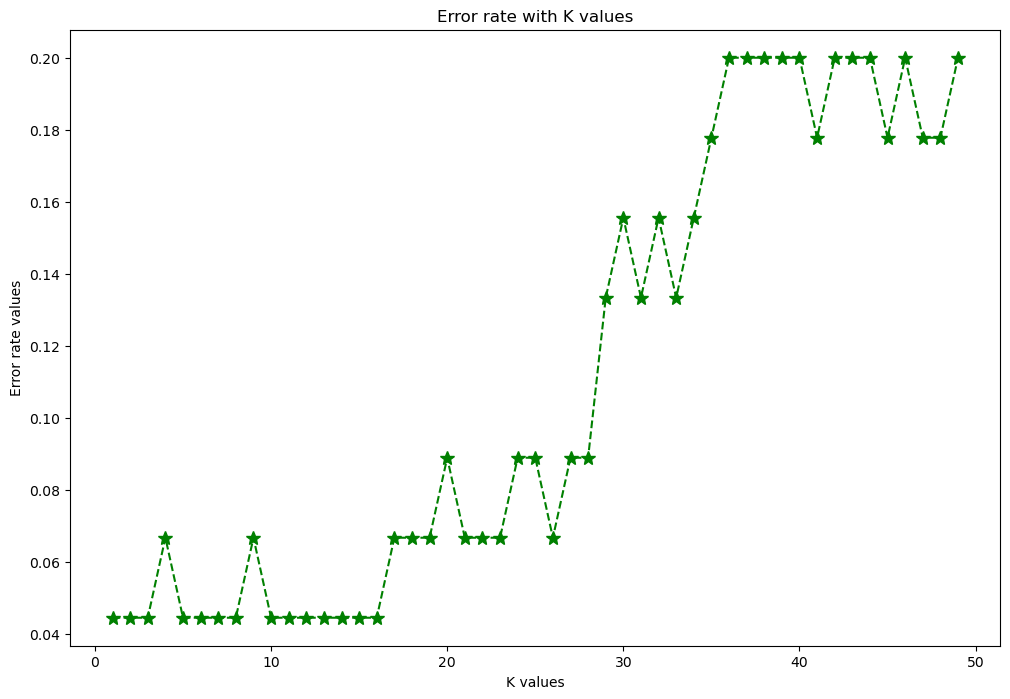

In [127]:
plt.figure(figsize=(12,8))
plt.plot(range(1,limit), error_rate, color="green", linestyle="--", marker="*", markersize=10)
plt.title("Error rate with K values")
plt.xlabel("K values")
plt.ylabel("Error rate values")

In [130]:
# From above result, lowest error rate values is already good with 1, but let's try with 12
K = 12
knn = KNeighborsClassifier(K)
knn.fit(X_train, y_train)

pred = knn.predict(X_test)

print(confusion_matrix(y_test, pred))
print("---")
print(classification_report(y_test, pred))

[[13  0  0]
 [ 0 15  1]
 [ 0  1 15]]
---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.94      0.94      0.94        16
           2       0.94      0.94      0.94        16

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

